In [3]:
import pandas as pd

# 현재 폴더에서 CSV 파일 읽기
df = pd.read_csv(r'C:\Users\dlwlg\team901\learning2_data.csv')


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25592,25593,25594,25595,25596,25597,25598,25599,fs,fault_type
0,3.899300,7.565520,1.296009,-6.861289,-5.934815,4.148840,8.311052,-0.166117,-6.853495,-4.057329,...,-1.204017,-1.127772,1.916237,2.095459,-2.029180,-5.232660,1.396363,7.535430,25600,1
1,-0.951626,-0.026867,0.475558,-0.157340,-0.342464,0.165069,0.143682,-0.368740,-0.219467,0.256157,...,0.030481,0.001685,-0.389913,-0.147019,0.320774,-0.054070,-0.336892,0.117773,25600,1
2,-3.929285,-7.165016,-0.110136,4.738086,2.834087,-1.568131,-3.172974,-1.409300,0.567256,3.044535,...,-4.879050,4.606160,4.547146,-4.647161,-3.728426,5.277608,3.435046,-5.358367,25600,1
3,-2.782683,5.760739,3.001560,-5.608408,-2.907724,5.079184,2.826995,-4.344326,-2.332803,4.276500,...,-0.050988,-0.799437,-0.406508,-0.030547,-0.112657,-0.351845,-0.337875,-0.369204,25600,1
4,-0.272671,-0.121940,-0.026397,0.054517,-0.398982,-0.034386,0.324217,0.461581,-0.208683,-0.133903,...,0.331815,0.082452,0.144409,0.025489,-0.240097,-0.179325,0.124719,0.158147,25600,1


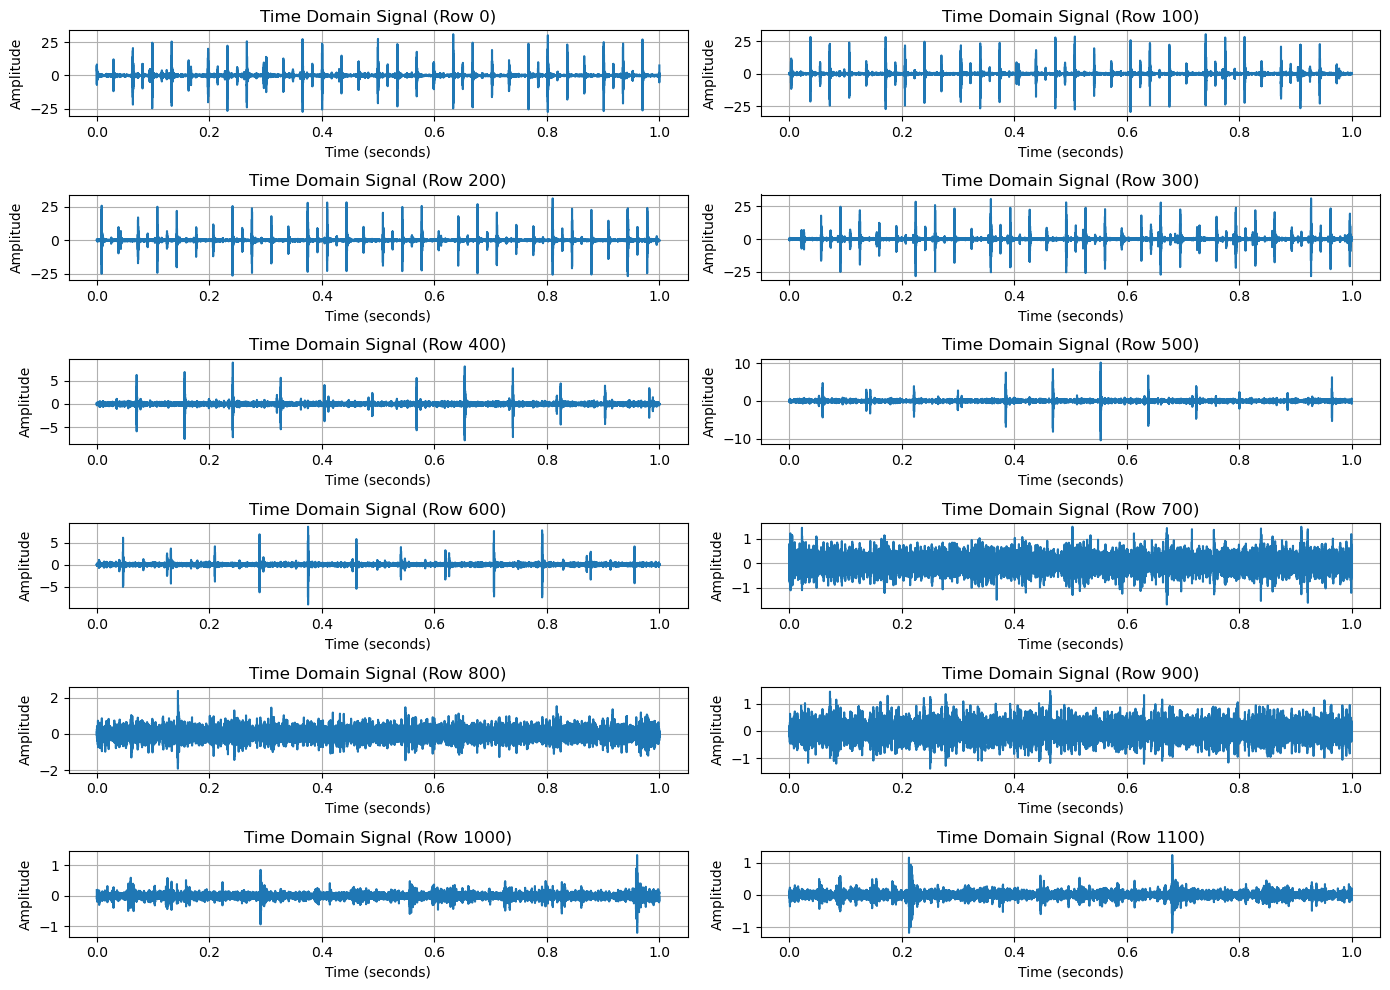

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 샘플링 주파수 설정 (fs = 25600 Hz)
fs = 25600  # 샘플링 주파수 (Hz, 샘플/초)

# 2. 1번째, 100번째, ..., 1200번째 행의 신호 데이터를 각각 시각화
rows_to_plot = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]  # 시각화할 행 번호 리스트 (총 12개)

plt.figure(figsize=(14, 10))  # 전체 플롯 크기 설정
for i, row in enumerate(rows_to_plot):
    # 신호 데이터 추출 (해당 행의 데이터)
    signal_data = df.iloc[row, :-2].values  # 해당 행의 신호 데이터 추출
    time = np.arange(len(signal_data)) / fs  # 시간 축을 초 단위로 변환
    
    # 플롯 생성
    plt.subplot(6, 2, i+1)  # 6행 2열 서브플롯 구성 (i+1번째 플롯)
    plt.plot(time, signal_data)
    plt.title(f"Time Domain Signal (Row {row})")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.grid(True)

# 전체 서브플롯 간 여백 조정
plt.tight_layout()
plt.show()


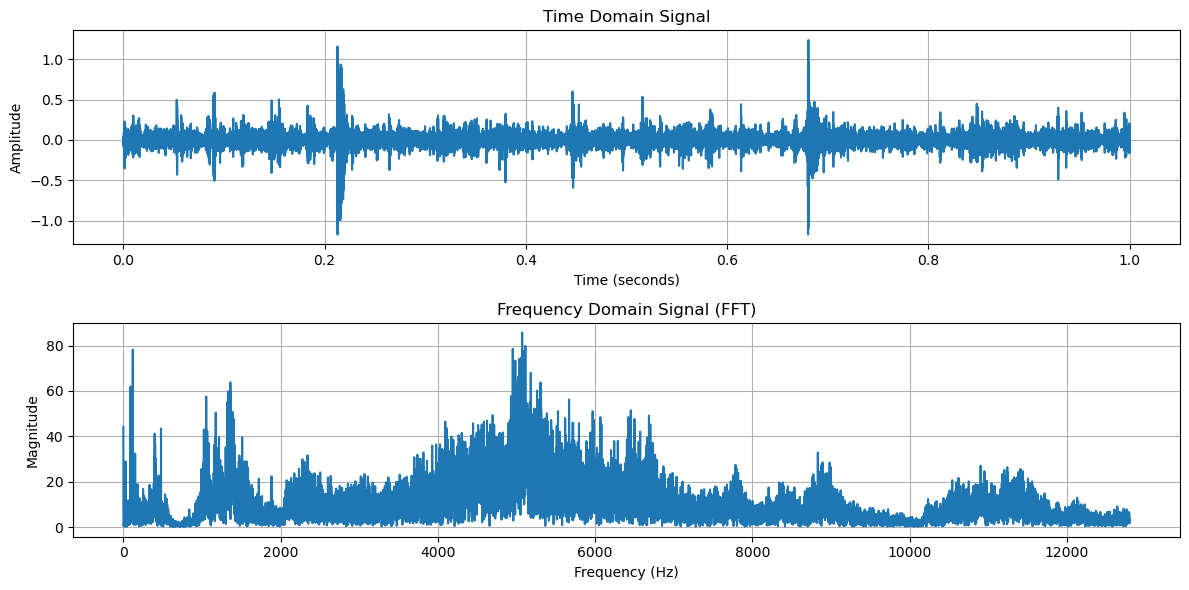

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# 1. 신호 데이터 생성 (25600개의 샘플)
signal_data = df.iloc[row, :-2].values  # 해당 행의 신호 데이터 추출

# 2. 샘플링 주파수 설정 (25600 Hz)
fs = 25600  # 샘플링 주파수 (25600 Hz)

# 3. 시간 축 생성 (초 단위)
time = np.arange(len(signal_data)) / fs

# 4. 시간 영역에서 신호 시각화
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)  # 2행 1열의 서브플롯 중 첫 번째 플롯
plt.plot(time, signal_data)
plt.title("Time Domain Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)

# 5. 주파수 영역 분석 (푸리에 변환 적용)
fft_values = fft(signal_data)
frequencies = np.fft.fftfreq(len(signal_data), d=1/fs)

# 6. 주파수 영역에서 신호 시각화
plt.subplot(2, 1, 2)  # 2행 1열의 서브플롯 중 두 번째 플롯
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values)[:len(fft_values)//2])
plt.title("Frequency Domain Signal (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)

plt.tight_layout()
plt.show()


In [13]:
fft_values

array([-118.27609658  -0.j        ,   -8.1394585  -47.98069751j,
        -86.49463937+125.10327941j, ...,  -15.84692733+153.57655438j,
        -86.49463937-125.10327941j,   -8.1394585  +47.98069751j])

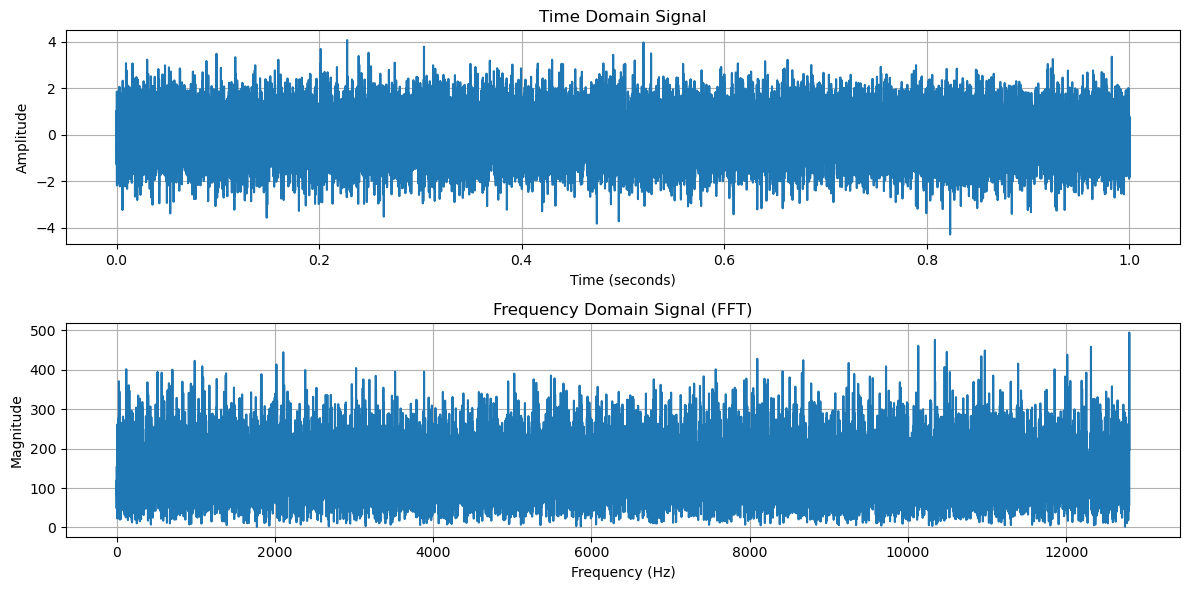

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# 1. 신호 데이터 생성 (25600개의 샘플)
signal_data = np.random.randn(25600)  # 랜덤 신호 데이터 생성 (예시)

# 2. 샘플링 주파수 설정 (25600 Hz)
fs = 25600  # 샘플링 주파수 (25600 Hz)

# 3. 시간 축 생성 (초 단위)
time = np.arange(len(signal_data)) / fs

# 4. 시간 영역에서 신호 시각화
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)  # 2행 1열의 서브플롯 중 첫 번째 플롯
plt.plot(time, signal_data)
plt.title("Time Domain Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)

# 5. 주파수 영역 분석 (푸리에 변환 적용)
fft_values = fft(signal_data)
frequencies = np.fft.fftfreq(len(signal_data), d=1/fs)

# 6. 주파수 영역에서 신호 시각화
plt.subplot(2, 1, 2)  # 2행 1열의 서브플롯 중 두 번째 플롯
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values)[:len(fft_values)//2])
plt.title("Frequency Domain Signal (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)

plt.tight_layout()
plt.show()
